> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [us_gun_data]


<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
df=pd.read_excel("gun-data.xlsx")
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#exploring the shape
df.shape

(12485, 27)

In [4]:
df.duplicated().sum()

0

In [13]:
df["permit"].duplicated().sum()

7094

In [16]:
df.duplicated(["permit","state","permit_recheck","handgun","long_gun","month"]).sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [18]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


exploring data

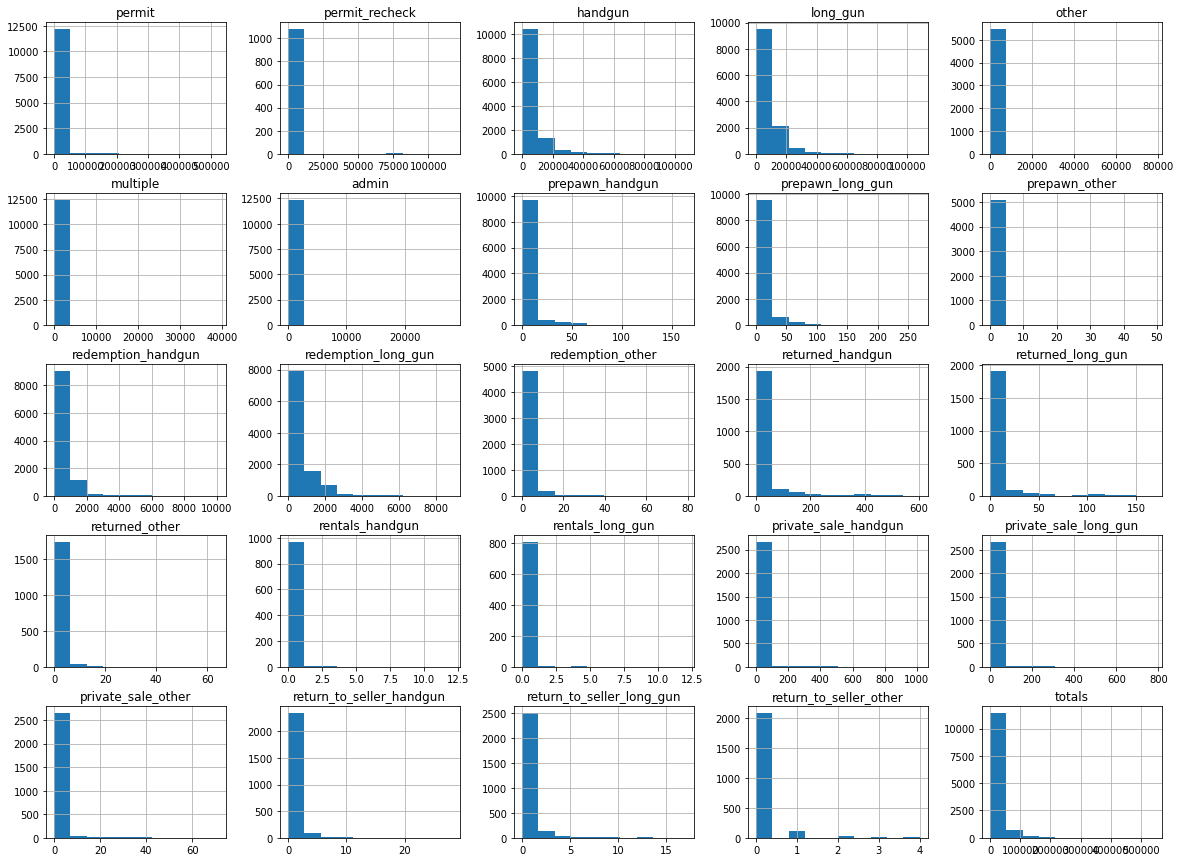

In [19]:
df.hist(figsize=(20,15));

Q1:the most consuming stste of handgun?

In [ ]:
plt.figure(figsize=[16,4]);
df.groupby ("state").handgun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

In [ ]:
df.groupby(["state"]).handgun.mean()

we can see that Texas is the most consuming state of hund gun then florida and california

Q2:the most consuming stste of longgun?

In [ ]:
plt.figure(figsize=[16,4]);
df.groupby ("state").long_gun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

In [ ]:
df.groupby(["state"]).long_gun.mean()

we could conclude that Pennsylvania is the most consuming state of long gun then texas and california

Q3:the most consuming stste of all types of guns ?

In [ ]:
plt.figure(figsize=[16,4]);
df.groupby ("state").other.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

we could conclude that california is the most consuming state of other_gun then texas and florida

In [ ]:
df.describe()

Q3:the most consuming stste of all types of guns ?

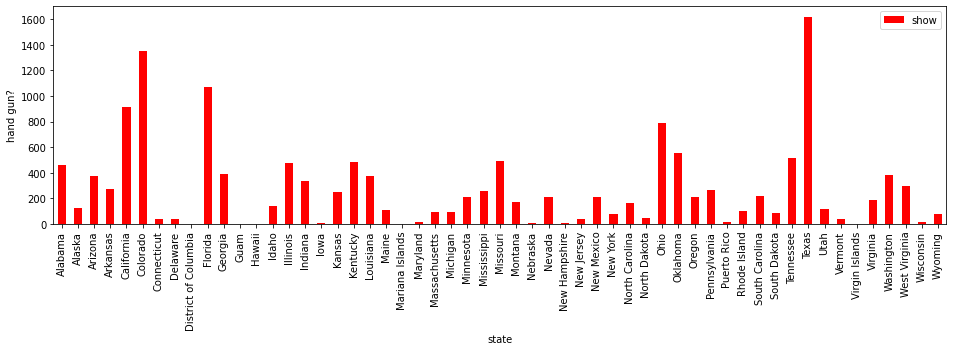

In [21]:
plt.figure(figsize=[16,4]);
df.groupby ("state").multiple.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

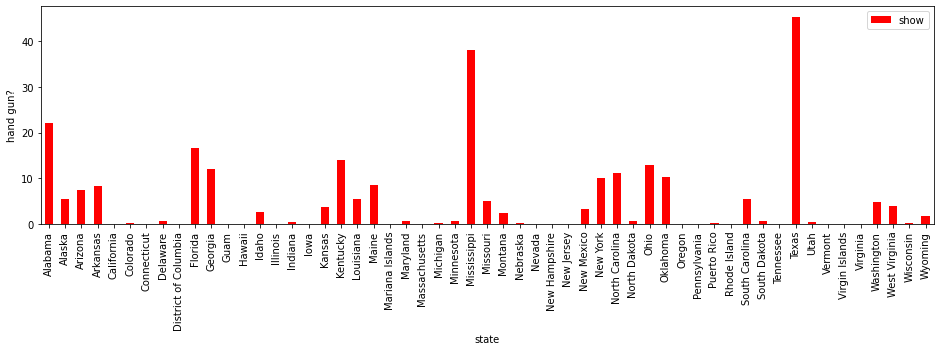

In [22]:
plt.figure(figsize=[16,4]);
df.groupby ("state").prepawn_handgun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

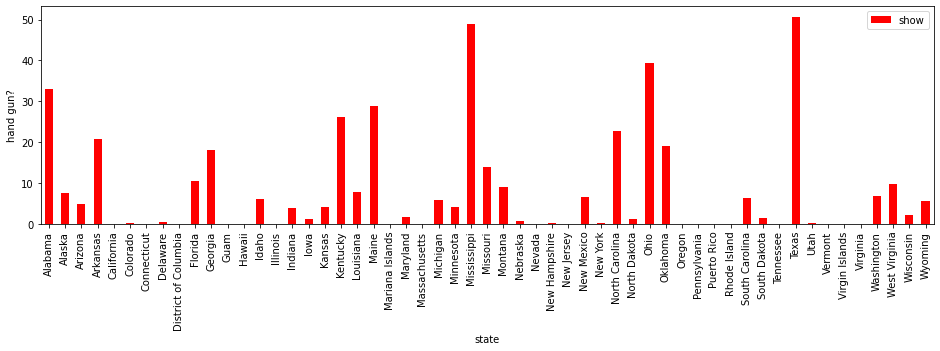

In [23]:
plt.figure(figsize=[16,4]);
df.groupby ("state").prepawn_long_gun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

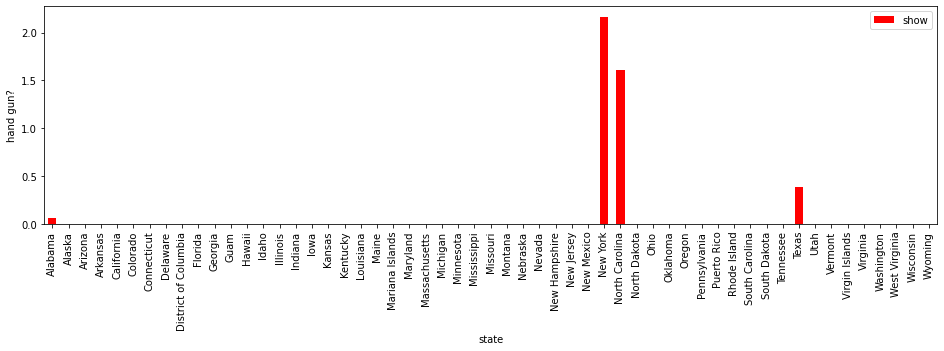

In [24]:
plt.figure(figsize=[16,4]);
df.groupby ("state").rentals_handgun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

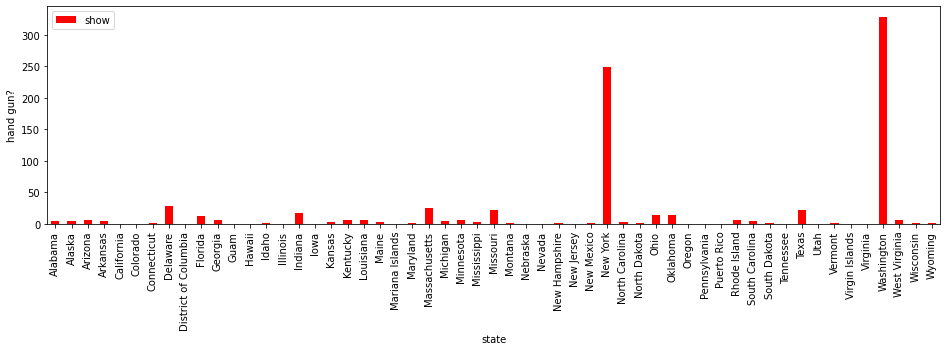

In [25]:
plt.figure(figsize=[16,4]);
df.groupby ("state").private_sale_handgun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

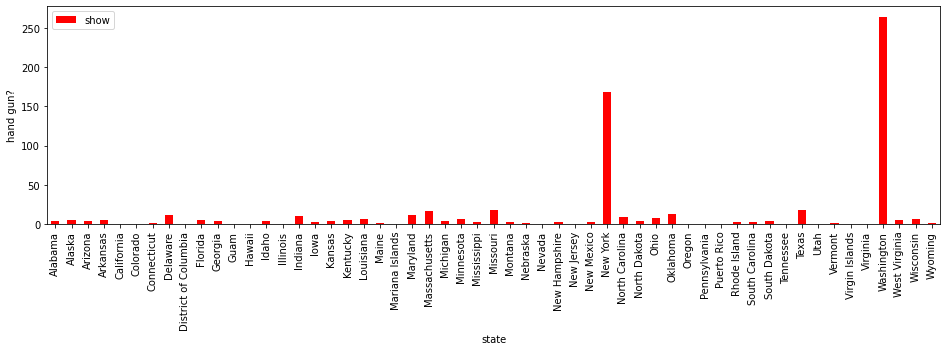

In [26]:
plt.figure(figsize=[16,4]);
df.groupby ("state").private_sale_long_gun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

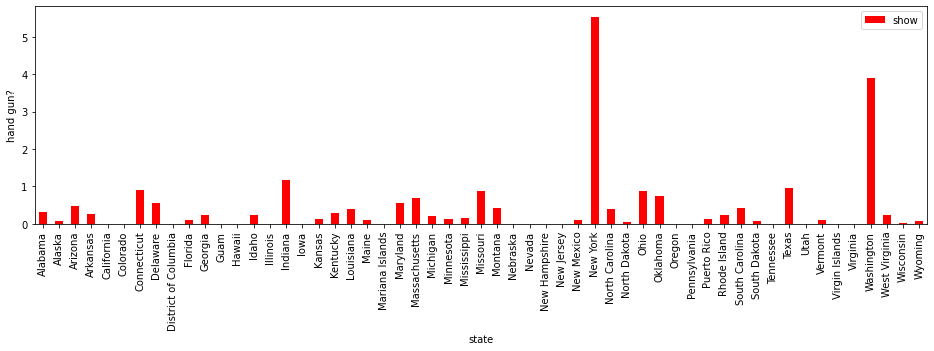

In [27]:
plt.figure(figsize=[16,4]);
df.groupby ("state").return_to_seller_handgun.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

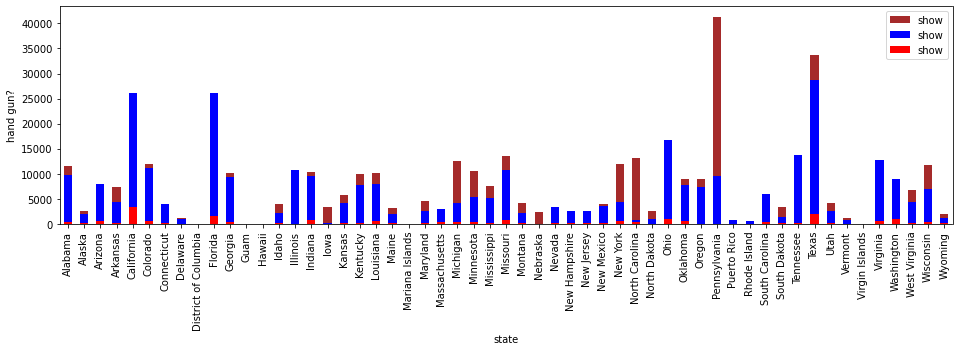

In [28]:
plt.figure(figsize=[16,4]);
df.groupby ("state").long_gun.mean().plot(kind='bar',color='brown',label='show');
df.groupby ("state").handgun.mean().plot(kind='bar',color='blue',label='show');
df.groupby ("state").other.mean().plot(kind='bar',color='red',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

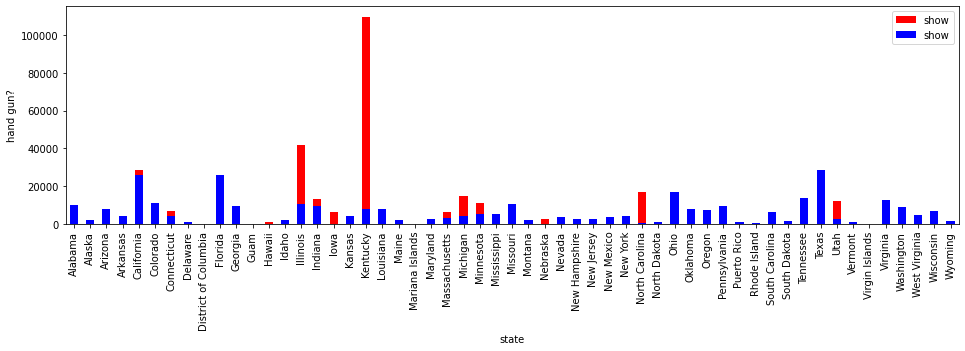

In [29]:
plt.figure(figsize=[16,4]);
df.groupby ("state").permit.mean().plot(kind='bar',color='red',label='show');
df.groupby ("state").handgun.mean().plot(kind='bar',color='blue',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

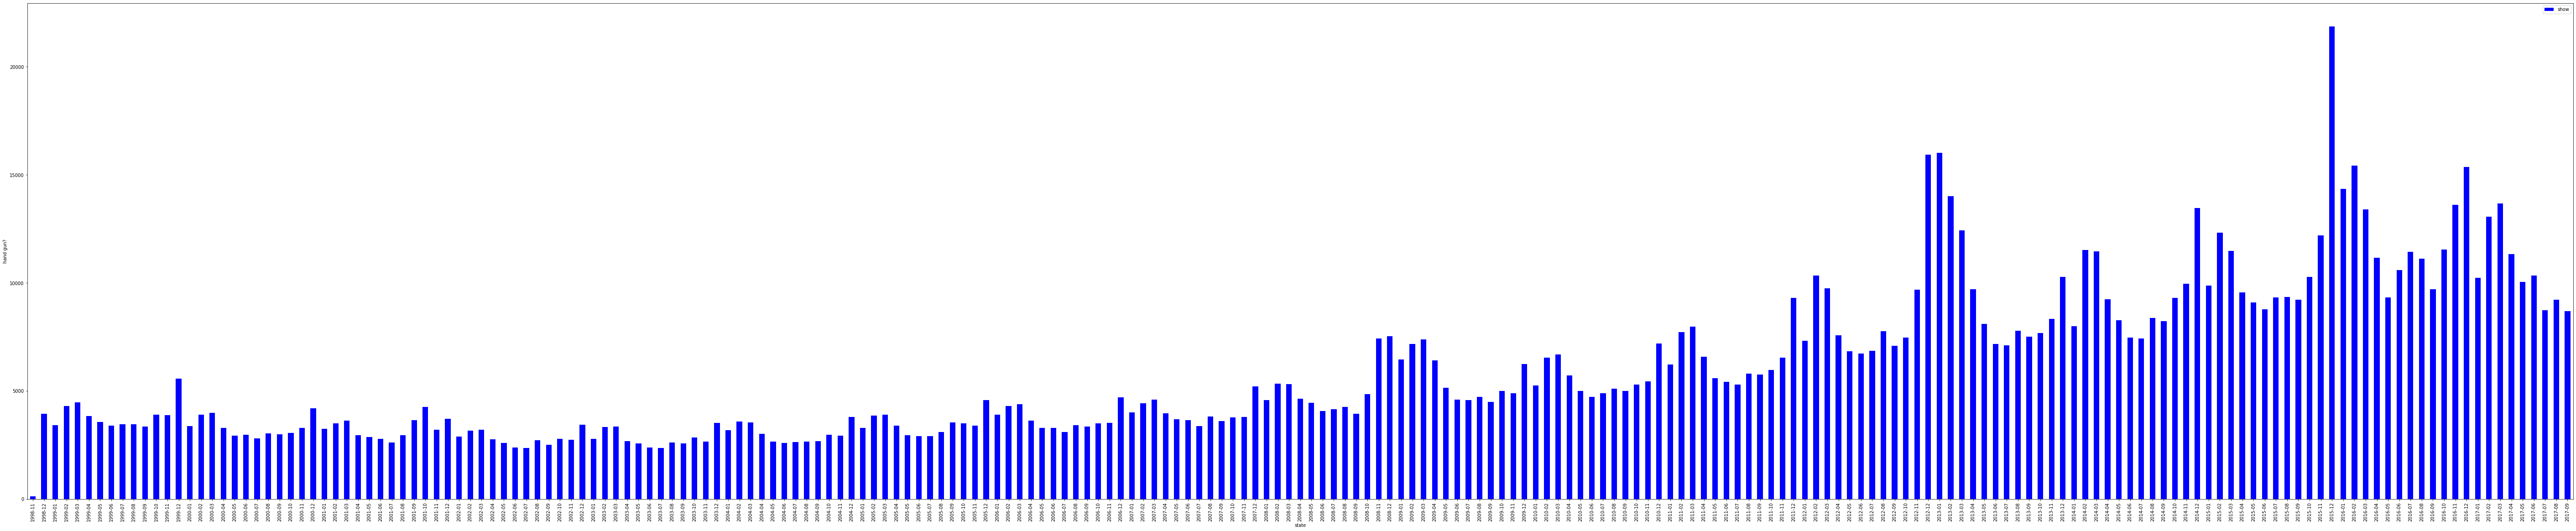

In [30]:
plt.figure(figsize=[100,20]);
df.groupby ("month").handgun.mean().plot(kind='bar',color='blue',label='show');
plt.legend();
plt.xlabel('state');
plt.ylabel('hand gun?');

In [31]:
df.groupby ("month").handgun.mean()

month
1998-11      124.709091
1998-12     3947.037037
1999-01     3416.592593
1999-02     4304.592593
1999-03     4463.629630
               ...     
2017-05    10036.690909
2017-06    10348.163636
2017-07     8729.527273
2017-08     9227.072727
2017-09     8692.400000
Name: handgun, Length: 227, dtype: float64

In [64]:
def attendence (df,col_name,attendent,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='bar',color="black",label="show-gp")
    plt.legend()
    plt.xlabel('Gender')
    plt.ylabel('patients Number')
attendence(df,"Gender",show,noshow)    

NameError: name 'show' is not defined

In [65]:
def attendence (df,col_name,attendent,absent):
    plt.figure(figsize=[16,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='bar',color="black",label="noshow-gp")
    plt.legend()
    plt.xlabel('Gender')
    plt.ylabel('patients Number')
attendence(df,"Gender",show,noshow)    

NameError: name 'show' is not defined

gender has no clear effect on attendence

In [ ]:
plt.figure(figsize=[16,4]);
df[show].groupby(["Gender"]).Age.mean().plot(kind='bar',color='red',label='show');
df[noshow].groupby(["Gender"]).Age.mean().plot(kind='bar',color='blue',label='noshow');
plt.legend();
plt.xlabel('Gender');
plt.ylabel('Mean age');

In [ ]:
df[show].groupby(["Gender"]).Age.mean(),df[noshow].groupby(["Gender"]).Age.mean()

there is no coorelation bet. the gender and age affect the show rate

does recieving sms affecting show rate?

does recieving sms affecting show rate

In [ ]:
def attendence (df,col_name,attendent,absent):
    plt.figure(figsize=[16,4])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label="noshow-gp")
    plt.legend()
    plt.xlabel('non-reciever SMS')
    plt.ylabel('patients Number')
attendence(df,"SMS_received",show,noshow)    

In [ ]:
def attendence (df,col_name,attendent,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label="show-gp")
    plt.legend()
    plt.xlabel('SMS reciever')
    plt.ylabel('patients Number')
attendence(df,"SMS_received",show,noshow)    

Neighbourhood has great effect on attendence

In [ ]:
plt.figure(figsize=[16,4]);
df[show].groupby ("Neighbourhood").SMS_received.mean().plot(kind='bar',color='yellow',label='show');
df[noshow].groupby ("Neighbourhood").SMS_received.mean().plot(kind='bar',color='brown',label='noshow');
plt.legend();
plt.xlabel('Neighbourhood');
plt.ylabel('patients Number');

sms has responce only in five states

In [ ]:
plt.figure(figsize=[16,4]);
df[show].groupby ("Neighbourhood").Age.mean().plot(kind='bar',color='brown',label='show');
df[noshow].groupby ("Neighbourhood").Age.mean().plot(kind='bar',color='blue',label='noshow');
plt.legend();
plt.xlabel('Neighbourhood');
plt.ylabel('mean age');

In [ ]:
patients attendence differ according to ages from specific states

In [ ]:
def attendence (df,col_name,attendent,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].plot(kind='bar',color='red',label='show');
    df[col_name][noshow].plot(kind='bar',color='blue',label='noshow');
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('patients Number')
attendence(df,"Age",show,noshow)    

<a id='conclusions'></a>
## Conclusions

Neighbourhood has great effect on attendence,jardim camburi has the greatest number of pateints who have the greatest show rate

sms has responce only in five states

age has clear influence on showing rate, Ages from 0:8 are the most showing
number of showing patients without recieving sms is greater than those whose recieved sms which means we have to upgrade our sms system
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])